In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import netCDF4
from netCDF4 import Dataset, num2date


import cmocean
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
if not os.path.exists('dataset'):
    os.makedirs('dataset')

In [4]:
extractionfile = os.path.join('dataset','ibtracs.SP.list.v04r00.csv')  # Use os.path.join so the script will work cross-platform

if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")

Skipping redownloading extraction data


In [5]:
df = pd.read_csv(extractionfile)
df.head()

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,8,9,14,25,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1897005S10135,1897,1,SP,EA,NOT_NAMED,1897-01-04 12:00:00,NR,-10.1000,135.300,...,,,,,,,,,9,246
2,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 15:00:00,NR,-10.2755,134.902,...,,,,,,,,,8,246
3,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 18:00:00,NR,-10.4406,134.523,...,,,,,,,,,8,246
4,1897005S10135,1897,1,SI,WA,NOT_NAMED,1897-01-04 21:00:00,NR,-10.5853,134.182,...,,,,,,,,,7,247


In [6]:
df = pd.read_csv(extractionfile, header = 0, usecols = ['SID', 'SEASON', 'NAME' ,'ISO_TIME', 'LAT', 'LON'])
df.head()

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SID,SEASON,NAME,ISO_TIME,LAT,LON
0,,Year,,,degrees_north,degrees_east
1,1897005S10135,1897,NOT_NAMED,1897-01-04 12:00:00,-10.1000,135.300
2,1897005S10135,1897,NOT_NAMED,1897-01-04 15:00:00,-10.2755,134.902
3,1897005S10135,1897,NOT_NAMED,1897-01-04 18:00:00,-10.4406,134.523
4,1897005S10135,1897,NOT_NAMED,1897-01-04 21:00:00,-10.5853,134.182


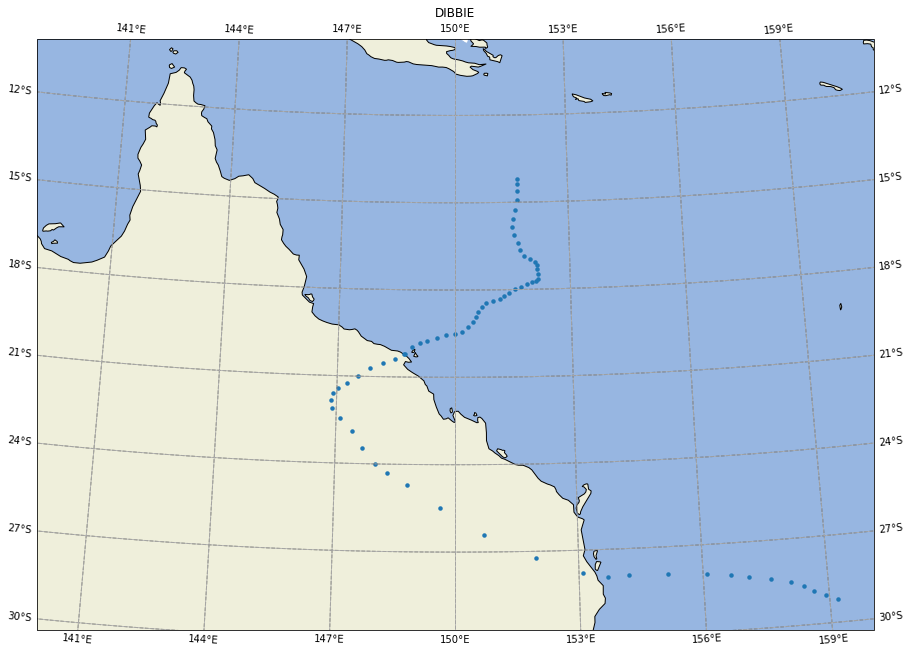

In [7]:
#Draw map
#DIBBIE
central_lat = -15
central_lon = 150
extent = [140, 160, -30, -10]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
fig= plt.figure(figsize = (15,15))
ax = plt.axes(projection = ccrs.EquidistantConic(central_lon, central_lat))
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels = True, xlocs=[-30, -25, -20, -15, -10])
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels = True, ylocs=[140, 145, 150, 155, 160])

ax.set_extent(extent)
ax.set_title('DIBBIE')
ax.set_xlabel('Latitude')
#ax.set_xticks([-35, -30, -25, -20, -15, -10, -5])

ax.set_ylabel('Longitude')
#ax.set_yticks([140, 145, 150, 155, 160, 165, 170])

#2017082S14152 is Debbie's data in 2017（The name is not unique, but the SID is unique）

df.loc[df['SID'] == '2017082S14152']

list_latD = []
list_lonD = []
DIBBIE = df.loc[df['SID'] == '2017082S14152'].iterrows()
#Traverse the latitude and longitude of all data to obtain precise latitude and longitude coordinates
for i,j in DIBBIE:
    latitude = df.loc[i]['LAT']
    longitude = df.loc[i]['LON']
    list_latD.append(latitude)
    list_lonD.append(longitude)
    
    #根据经纬度在地图上画出相应的路线
    #plt.scatter(longtitude, latitude,  linestyle='-', color='black', marker='.', linewidth=1.5, transform=ccrs.PlateCarree())
    #ax.plot(latitude, longtitude, linestyle='-', marker='x', linewidth=1.5, transform = ccrs.Geodetic())

plt.scatter(list_lonD, list_latD, linestyle='-',marker='.', linewidth=1.5, transform=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.gridlines()

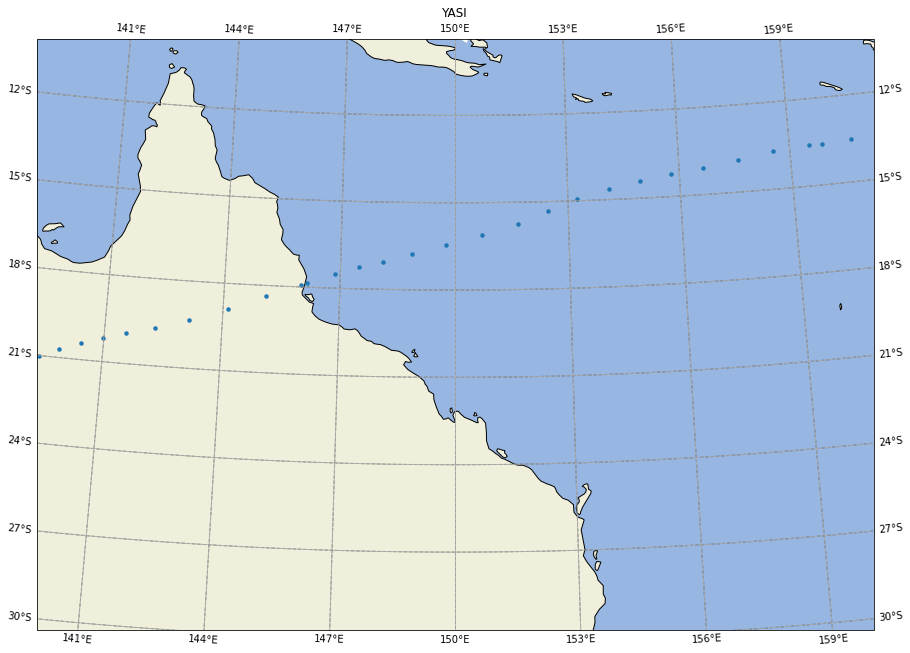

In [8]:
#Draw map
#YASI
central_lat = -15
central_lon = 150
extent = [140, 160, -30, -10]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
fig= plt.figure(figsize = (15,15))
ax = plt.axes(projection = ccrs.EquidistantConic(central_lon, central_lat))
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels = True, xlocs=[-30, -25, -20, -15, -10])
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels = True, ylocs=[140, 145, 150, 155, 160])

ax.set_extent(extent)
ax.set_title('YASI')
ax.set_xlabel('Latitude')
#ax.set_xticks([-35, -30, -25, -20, -15, -10, -5])

ax.set_ylabel('Longitude')
#ax.set_yticks([140, 145, 150, 155, 160, 165, 170])

#2011028S13180 is YASI's data in 2011（The name is not unique, but the SID is unique）

df.loc[df['SID'] == '2011028S13180']

list_latY = []
list_lonY = []
YASI = df.loc[df['SID'] == '2011028S13180'].iterrows()
#Traverse the latitude and longitude of all data to obtain precise latitude and longitude coordinates
for i,j in YASI:
    latitude = df.loc[i]['LAT']
    longitude = df.loc[i]['LON']
    list_latY.append(latitude)
    list_lonY.append(longitude)
    
    #根据经纬度在地图上画出相应的路线
    #plt.scatter(longtitude, latitude,  linestyle='-', color='black', marker='.', linewidth=1.5, transform=ccrs.PlateCarree())
    #ax.plot(latitude, longtitude, linestyle='-', marker='x', linewidth=1.5, transform = ccrs.Geodetic())

plt.scatter(list_lonY, list_latY, linestyle='-',marker='.', linewidth=1.5, transform=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.gridlines()

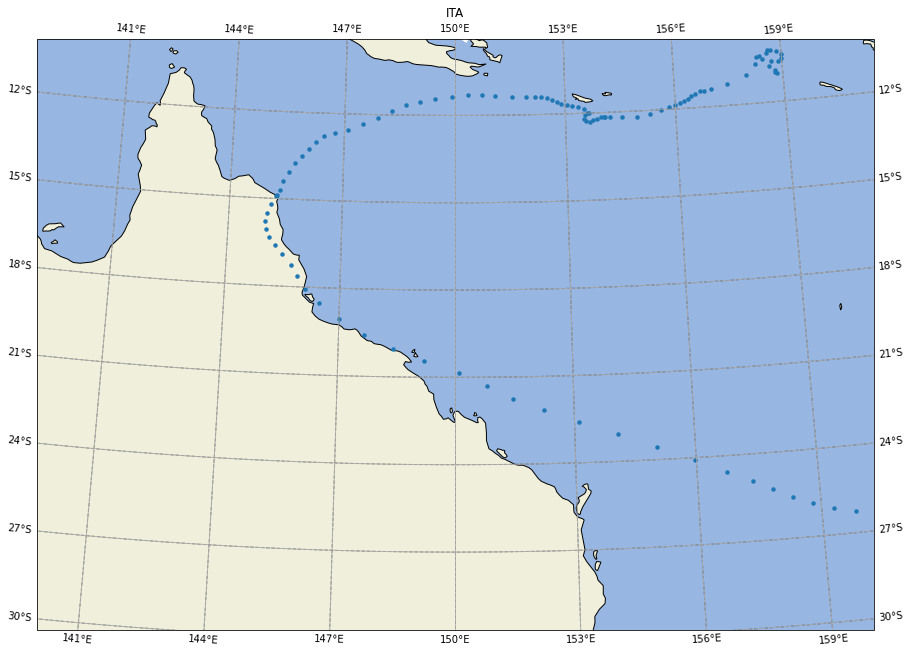

In [9]:
#Draw map
#ITA
central_lat = -15
central_lon = 150
extent = [140, 160, -30, -10]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
fig= plt.figure(figsize = (15,15))
ax = plt.axes(projection = ccrs.EquidistantConic(central_lon, central_lat))
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels = True, xlocs=[-30, -25, -20, -15, -10])
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels = True, ylocs=[140, 145, 150, 155, 160])

ax.set_extent(extent)
ax.set_title('ITA')
ax.set_xlabel('Latitude')
#ax.set_xticks([-35, -30, -25, -20, -15, -10, -5])

ax.set_ylabel('Longitude')
#ax.set_yticks([140, 145, 150, 155, 160, 165, 170])

#2017082S14152 is Debbie's data in 2017（The name is not unique, but the SID is unique）

df.loc[df['SID'] == '2014092S11159']

list_latITA = []
list_lonITA = []
ITA = df.loc[df['SID'] == '2014092S11159'].iterrows()
#Traverse the latitude and longitude of all data to obtain precise latitude and longitude coordinates
for i,j in ITA:
    latitude = df.loc[i]['LAT']
    longitude = df.loc[i]['LON']
    list_latITA.append(latitude)
    list_lonITA.append(longitude)
    
    #根据经纬度在地图上画出相应的路线
    #plt.scatter(longtitude, latitude,  linestyle='-', color='black', marker='.', linewidth=1.5, transform=ccrs.PlateCarree())
    #ax.plot(latitude, longtitude, linestyle='-', marker='x', linewidth=1.5, transform = ccrs.Geodetic())

plt.scatter(list_lonITA, list_latITA, linestyle='-',marker='.', linewidth=1.5, transform=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.gridlines()

In [10]:
#YASI
month = 1
year = 2011

netCDF_datestr = str(year)+'-'+format(month, '02')
inputFile1 = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+ netCDF_datestr + ".nc"

month = 2
year = 2011
netCDF_datestr = str(year)+'-'+format(month, '02')
inputFile2 = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+ netCDF_datestr + ".nc"

ds1 = xr.open_dataset(inputFile1)
ds2 = xr.open_dataset(inputFile2)

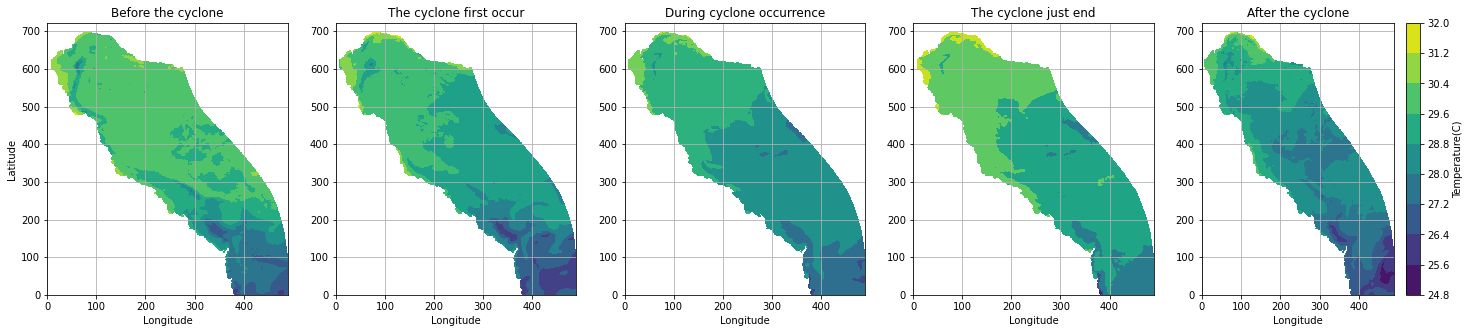

In [11]:
#YASI Temperature
fig, ax = plt.subplots(figsize = (25, 5), nrows = 1, ncols= 5)

YasiPlot0 = ax[0].contourf(ds1.temp.isel(time = 20, k = 11))
YasiPlot1 = ax[1].contourf(ds1.temp.isel(time = 28, k = 11))
YasiPlot2 = ax[2].contourf(ds2.temp.isel(time = 3, k = 11))
YasiPlot3 = ax[3].contourf(ds2.temp.isel(time = 6, k = 11))
YasiPlot4 = ax[4].contourf(ds2.temp.isel(time = 16, k = 11))

Timing= ['Before the cyclone','The cyclone first occur','During cyclone occurrence','The cyclone just end','After the cyclone']

ax[0].set_ylabel('Latitude')
for i in np.arange(0,5):
    ax[i].set_title(Timing[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()

fig.colorbar(YasiPlot4, label=r'Temperature(C)')

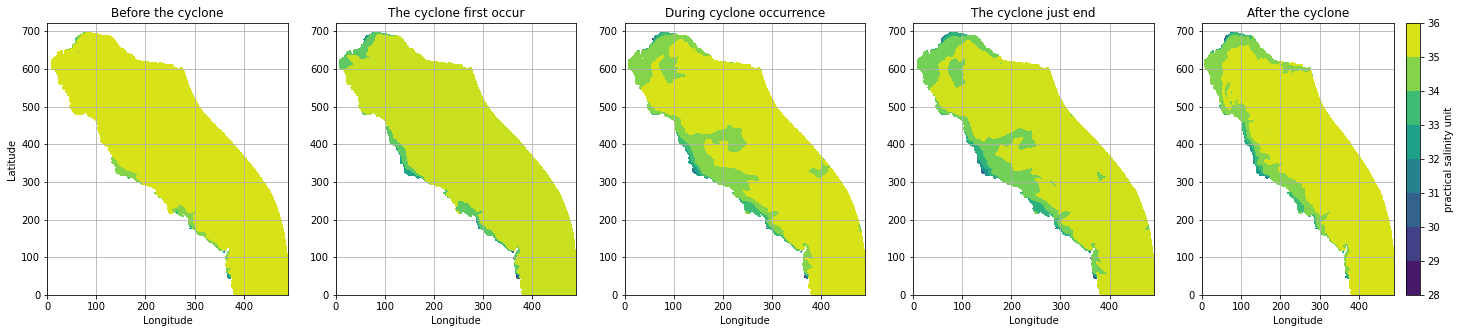

In [12]:
#YASI Salinity
fig, ax = plt.subplots(figsize = (25, 5), nrows = 1, ncols= 5)

YasiPlot0 = ax[0].contourf(ds1.salt.isel(time = 20, k = 11))
YasiPlot1 = ax[1].contourf(ds1.salt.isel(time = 28, k = 11))
YasiPlot2 = ax[2].contourf(ds2.salt.isel(time = 3, k = 11))
YasiPlot3 = ax[3].contourf(ds2.salt.isel(time = 6, k = 11))
YasiPlot4 = ax[4].contourf(ds2.salt.isel(time = 16, k = 11))

Timing= ['Before the cyclone',
         'The cyclone first occur',
         'During cyclone occurrence',
         'The cyclone just end',
         'After the cyclone']

ax[0].set_ylabel('Latitude')
for i in np.arange(0,5):
    ax[i].set_title(Timing[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()

fig.colorbar(YasiPlot4, label=r'practical salinity unit')

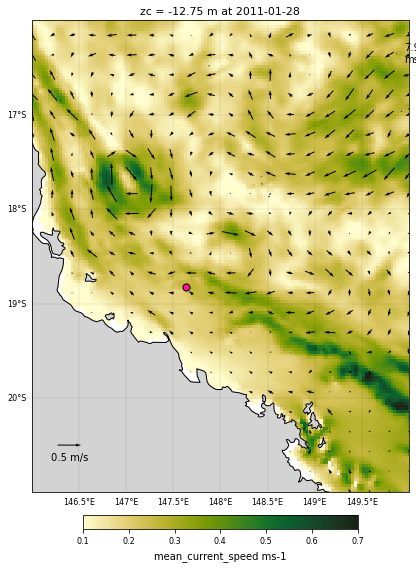

<Figure size 432x288 with 0 Axes>

In [15]:
#Yasi  2011-01-28  Current
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

month_st = 1   # Starting month 
month_ed = 1   # Ending month 
year = 2011    # Year
reef_lat = -18.82
reef_lon = 147.64

hydrofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
ds_hydro = xr.open_mfdataset(hydrofiles)

min_lon = 146     # lower left longitude
min_lat = -21     # lower left latitude
max_lon = 150    # upper right longitude
max_lat = -16     # upper right latitude
size = (7, 8) #Figure size
timevar = 28 # Time step to plot
zcvar = 11 # z-coordinate position (here the top one)

# Color from cmocean
color = cmocean.cm.speed
# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro_clip.mean_cur.isel(time=timevar,k=zcvar).plot( transform=ccrs.PlateCarree(), cmap=color,vmin = 0.1, vmax = 0.7,add_colorbar=False)

# Resampling using the slice method
resample = ds_hydro_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="horizontal")
cbar.set_label(ds_hydro_clip.mean_cur.long_name+' '+ds_hydro_clip.mean_cur.units, rotation=0,  labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro_clip.mean_cur.zc.values.item(zcvar))+' m at '+str(ds_hydro_clip.mean_cur.coords['time'].values[timevar])[:10],fontsize=11)

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

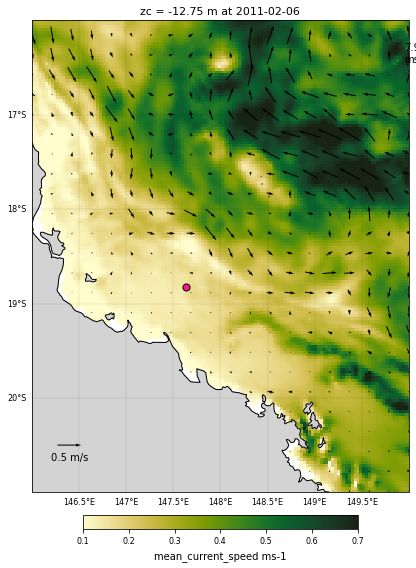

<Figure size 432x288 with 0 Axes>

In [19]:
#Yasi  2011-02-06  Current
month_st = 2   # Starting month 
month_ed = 2   # Ending month

hydrofiles2 = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

ds_hydro2 = xr.open_mfdataset(hydrofiles2)

timevar = 6 # Time step to plot

ds_hydro2_clip = ds_hydro2.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro2_clip.mean_cur.isel(time=timevar,k=zcvar).plot( transform=ccrs.PlateCarree(), cmap=color,vmin = 0.1, vmax = 0.7,add_colorbar=False)

# Resampling using the slice method
resample = ds_hydro2_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="horizontal")
cbar.set_label(ds_hydro2_clip.mean_cur.long_name+' '+ds_hydro2_clip.mean_cur.units, rotation=0,  labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro2_clip.mean_cur.zc.values.item(zcvar))+' m at '+str(ds_hydro2_clip.mean_cur.coords['time'].values[timevar])[:10],fontsize=11)

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [21]:
#ITA
month = 3
year = 2014

netCDF_datestr = str(year)+'-'+format(month, '02')
inputFile1 = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+ netCDF_datestr + ".nc"

month = 4
year = 2014
netCDF_datestr = str(year)+'-'+format(month, '02')
inputFile2 = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+ netCDF_datestr + ".nc"

ds1 = xr.open_dataset(inputFile1)
ds2 = xr.open_dataset(inputFile2)

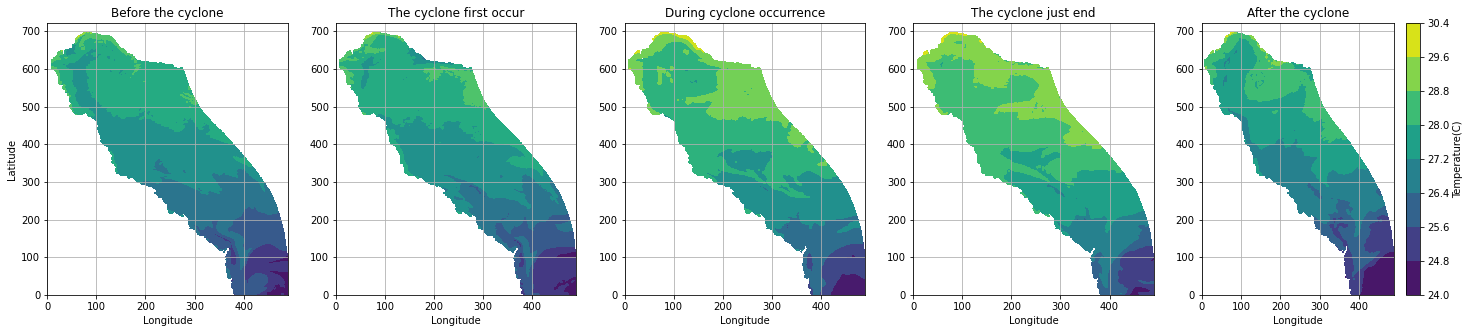

In [22]:
#ITA Temperature
fig, ax = plt.subplots(figsize = (25, 5), nrows = 1, ncols= 5)

YasiPlot0 = ax[0].contourf(ds1.temp.isel(time = 25, k = 11))
YasiPlot1 = ax[1].contourf(ds2.temp.isel(time = 2, k = 11))
YasiPlot2 = ax[2].contourf(ds2.temp.isel(time = 10, k = 11))
YasiPlot3 = ax[3].contourf(ds2.temp.isel(time = 18, k = 11))
YasiPlot4 = ax[4].contourf(ds2.temp.isel(time = 28, k = 11))

Timing= ['Before the cyclone','The cyclone first occur','During cyclone occurrence','The cyclone just end','After the cyclone']

ax[0].set_ylabel('Latitude')
for i in np.arange(0,5):
    ax[i].set_title(Timing[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()

fig.colorbar(YasiPlot4, label=r'Temperature(C)')

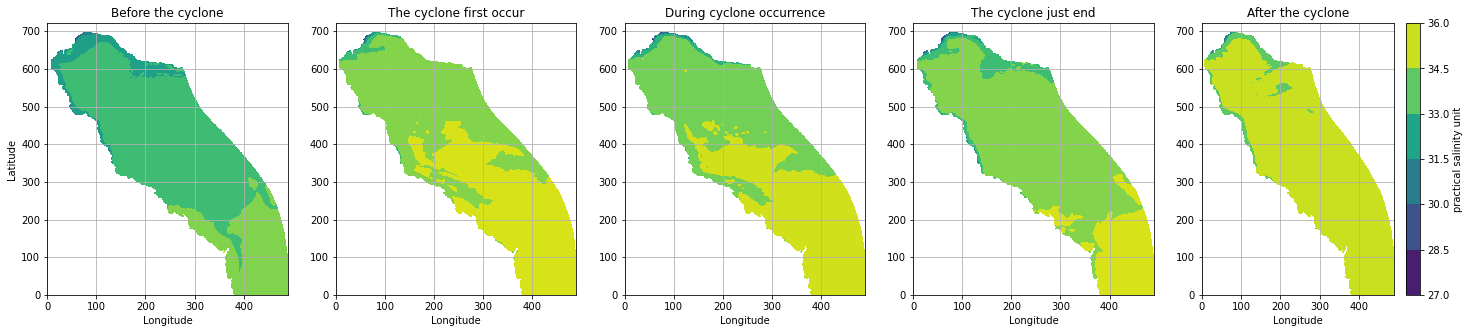

In [23]:
#YASI Salinity
fig, ax = plt.subplots(figsize = (25, 5), nrows = 1, ncols= 5)

YasiPlot0 = ax[0].contourf(ds1.salt.isel(time = 25, k = 11))
YasiPlot1 = ax[1].contourf(ds2.salt.isel(time = 2, k = 11))
YasiPlot2 = ax[2].contourf(ds2.salt.isel(time = 10, k = 11))
YasiPlot3 = ax[3].contourf(ds2.salt.isel(time = 18, k = 11))
YasiPlot4 = ax[4].contourf(ds2.salt.isel(time = 28, k = 11))

Timing= ['Before the cyclone',
         'The cyclone first occur',
         'During cyclone occurrence',
         'The cyclone just end',
         'After the cyclone']

ax[0].set_ylabel('Latitude')
for i in np.arange(0,5):
    ax[i].set_title(Timing[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()

fig.colorbar(YasiPlot4, label=r'practical salinity unit')

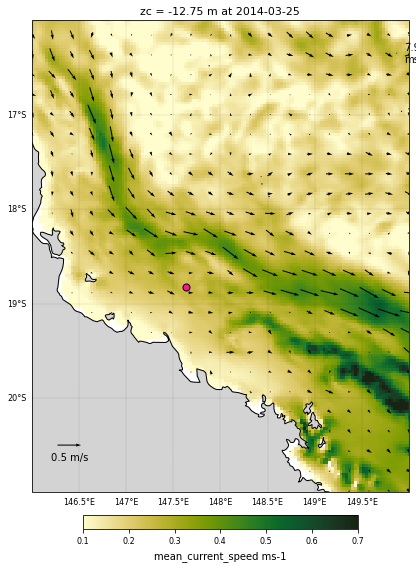

<Figure size 432x288 with 0 Axes>

In [20]:
#ITA 2014-03-25  Current
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

month_st = 3   # Starting month 
month_ed = 3   # Ending month 
year = 2014    # Year
reef_lat = -18.82
reef_lon = 147.64

hydrofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
ds_hydro = xr.open_mfdataset(hydrofiles)

min_lon = 146     # lower left longitude
min_lat = -21     # lower left latitude
max_lon = 150    # upper right longitude
max_lat = -16     # upper right latitude
size = (7, 8) #Figure size
timevar = 25 # Time step to plot
zcvar = 11 # z-coordinate position (here the top one)

# Color from cmocean
color = cmocean.cm.speed
# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro_clip.mean_cur.isel(time=timevar,k=zcvar).plot( transform=ccrs.PlateCarree(), cmap=color,vmin = 0.1, vmax = 0.7,add_colorbar=False)

# Resampling using the slice method
resample = ds_hydro_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="horizontal")
cbar.set_label(ds_hydro_clip.mean_cur.long_name+' '+ds_hydro_clip.mean_cur.units, rotation=0,  labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro_clip.mean_cur.zc.values.item(zcvar))+' m at '+str(ds_hydro_clip.mean_cur.coords['time'].values[timevar])[:10],fontsize=11)

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

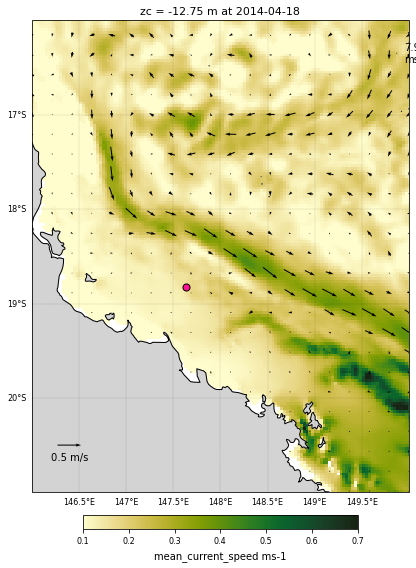

<Figure size 432x288 with 0 Axes>

In [21]:
#ITA 2014-04-18  Current
month_st = 4   # Starting month 
month_ed = 4   # Ending month

hydrofiles2 = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

ds_hydro2 = xr.open_mfdataset(hydrofiles2)

timevar = 18 # Time step to plot

ds_hydro2_clip = ds_hydro2.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro2_clip.mean_cur.isel(time=timevar,k=zcvar).plot( transform=ccrs.PlateCarree(), cmap=color,vmin = 0.1, vmax = 0.7,add_colorbar=False)

# Resampling using the slice method
resample = ds_hydro2_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="horizontal")
cbar.set_label(ds_hydro2_clip.mean_cur.long_name+' '+ds_hydro2_clip.mean_cur.units, rotation=0,  labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro2_clip.mean_cur.zc.values.item(zcvar))+' m at '+str(ds_hydro2_clip.mean_cur.coords['time'].values[timevar])[:10],fontsize=11)

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [24]:
#DEBBIE
month = 3
year = 2017

netCDF_datestr = str(year)+'-'+format(month, '02')
inputFile1 = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+ netCDF_datestr + ".nc"

month = 4
year = 2017
netCDF_datestr = str(year)+'-'+format(month, '02')
inputFile2 = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+ netCDF_datestr + ".nc"

ds1 = xr.open_dataset(inputFile1)
ds2 = xr.open_dataset(inputFile2)

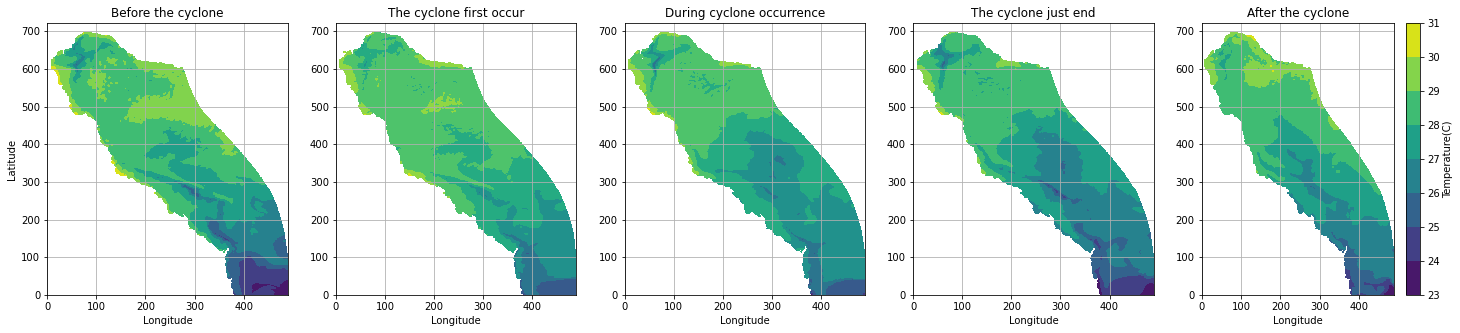

In [25]:
#DEBBIE Temperature
fig, ax = plt.subplots(figsize = (25, 5), nrows = 1, ncols= 5)

YasiPlot0 = ax[0].contourf(ds1.temp.isel(time = 15, k = 11))
YasiPlot1 = ax[1].contourf(ds1.temp.isel(time = 23, k = 11))
YasiPlot2 = ax[2].contourf(ds1.temp.isel(time = 28, k = 11))
YasiPlot3 = ax[3].contourf(ds2.temp.isel(time = 1, k = 11))
YasiPlot4 = ax[4].contourf(ds2.temp.isel(time = 11, k = 11))

Timing= ['Before the cyclone','The cyclone first occur','During cyclone occurrence','The cyclone just end','After the cyclone']

ax[0].set_ylabel('Latitude')
for i in np.arange(0,5):
    ax[i].set_title(Timing[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()

fig.colorbar(YasiPlot4, label=r'Temperature(C)')

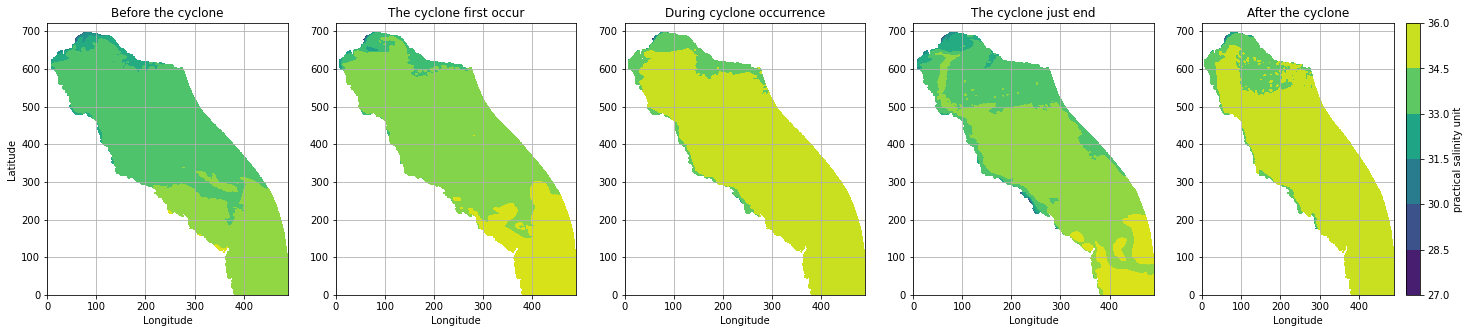

In [26]:
#DEBBIE Salinity
fig, ax = plt.subplots(figsize = (25, 5), nrows = 1, ncols= 5)

YasiPlot0 = ax[0].contourf(ds1.salt.isel(time = 15, k = 11))
YasiPlot1 = ax[1].contourf(ds1.salt.isel(time = 23, k = 11))
YasiPlot2 = ax[2].contourf(ds1.salt.isel(time = 28, k = 11))
YasiPlot3 = ax[3].contourf(ds2.salt.isel(time = 1, k = 11))
YasiPlot4 = ax[4].contourf(ds2.salt.isel(time = 11, k = 11))

Timing= ['Before the cyclone',
         'The cyclone first occur',
         'During cyclone occurrence',
         'The cyclone just end',
         'After the cyclone']

ax[0].set_ylabel('Latitude')
for i in np.arange(0,5):
    ax[i].set_title(Timing[i])
    ax[i].set_xlabel('Longitude')
    ax[i].grid()

fig.colorbar(YasiPlot4, label=r'practical salinity unit')

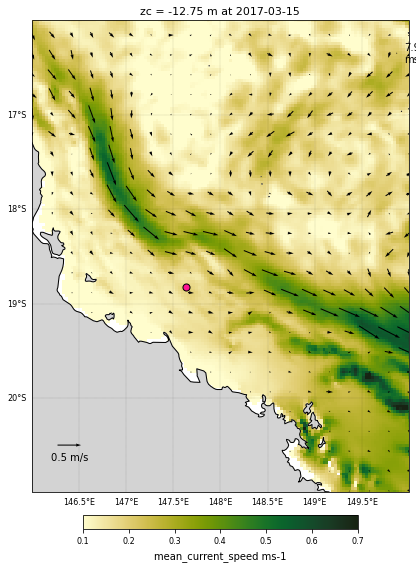

<Figure size 432x288 with 0 Axes>

In [22]:
#ITA 2017-03-15  Current
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

month_st = 3   # Starting month 
month_ed = 3   # Ending month 
year = 2017    # Year
reef_lat = -18.82
reef_lon = 147.64

hydrofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
ds_hydro = xr.open_mfdataset(hydrofiles)

min_lon = 146     # lower left longitude
min_lat = -21     # lower left latitude
max_lon = 150    # upper right longitude
max_lat = -16     # upper right latitude
size = (7, 8) #Figure size
timevar = 15 # Time step to plot
zcvar = 11 # z-coordinate position (here the top one)

# Color from cmocean
color = cmocean.cm.speed
# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro_clip.mean_cur.isel(time=timevar,k=zcvar).plot( transform=ccrs.PlateCarree(), cmap=color,vmin = 0.1, vmax = 0.7,add_colorbar=False)

# Resampling using the slice method
resample = ds_hydro_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="horizontal")
cbar.set_label(ds_hydro_clip.mean_cur.long_name+' '+ds_hydro_clip.mean_cur.units, rotation=0,  labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro_clip.mean_cur.zc.values.item(zcvar))+' m at '+str(ds_hydro_clip.mean_cur.coords['time'].values[timevar])[:10],fontsize=11)

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

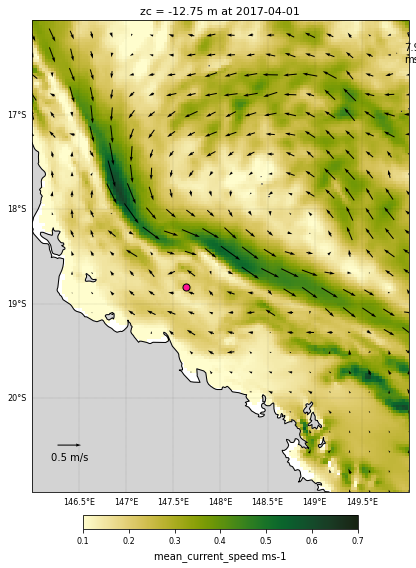

<Figure size 432x288 with 0 Axes>

In [23]:
#ITA 2017-04-1  Current
month_st = 4   # Starting month 
month_ed = 4   # Ending month

hydrofiles2 = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

ds_hydro2 = xr.open_mfdataset(hydrofiles2)

timevar = 1 # Time step to plot

ds_hydro2_clip = ds_hydro2.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro2_clip.mean_cur.isel(time=timevar,k=zcvar).plot( transform=ccrs.PlateCarree(), cmap=color,vmin = 0.1, vmax = 0.7,add_colorbar=False)

# Resampling using the slice method
resample = ds_hydro2_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="horizontal")
cbar.set_label(ds_hydro2_clip.mean_cur.long_name+' '+ds_hydro2_clip.mean_cur.units, rotation=0,  labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro2_clip.mean_cur.zc.values.item(zcvar))+' m at '+str(ds_hydro2_clip.mean_cur.coords['time'].values[timevar])[:10],fontsize=11)

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()